In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sql_function import create_connection
from sql_query import rented_film_by_customer

In [2]:
pd.plotting.register_matplotlib_converters()
plt.style.use("seaborn-whitegrid")
pd.set_option("display.max_columns", 500)
warnings.filterwarnings("ignore")

### Create SQL Connection to SQLite

In [4]:
SQL_PATH = 'sqlite-sakila.db'
connection = create_connection(SQL_PATH)

Connection to SQLite is successful


### Checking Query Table and Validate Data

In [5]:
df = pd.read_sql_query(rented_film_by_customer, connection)
df.head()

,first_name,last_name,n_film
0,AARON,SELBY,24
1,ADAM,GOOCH,22
2,ADRIAN,CLARY,19
3,AGNES,BISHOP,23
4,ALAN,KAHN,26


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   first_name  599 non-null    object
 1   last_name   599 non-null    object
 2   n_film      599 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 14.2+ KB


In [6]:
df.isnull().sum()

first_name    0
last_name     0
n_film        0
dtype: int64

In [9]:
df[df.duplicated()]

,first_name,last_name,n_film


### Data Analysis

In [14]:
most_renter = df.sort_values("n_film", ascending=False)[0:10]

,first_name,last_name,n_film
175,ELEANOR,HUNT,46
318,KARL,SEAL,45
379,MARCIA,DEAN,42
105,CLARA,SHAW,42
536,TAMMY,SANDERS,41
590,WESLEY,BULL,40
531,SUE,PETERS,40
389,MARION,SNYDER,39
551,TIM,CARY,39
474,RHONDA,KENNEDY,39


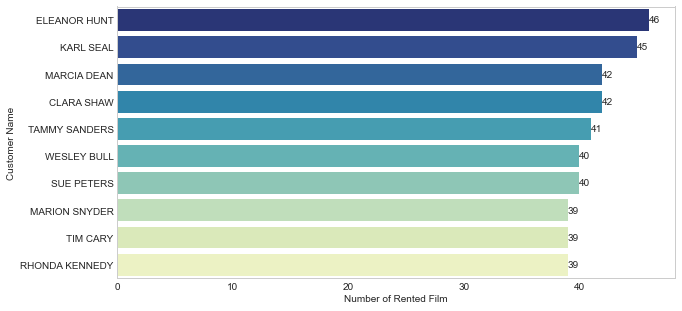

In [17]:
## Create new column for full name = first name + last name
most_renter["full_name"] = most_renter["first_name"] + " " + most_renter["last_name"]

plt.figure(figsize=(10, 5))

ax = sns.barplot(x="n_film", 
            y="full_name",
            palette="YlGnBu_r",
            data=most_renter)

ax.bar_label(ax.containers[0])
ax.grid(False)

plt.xlabel("Number of Rented Film")
plt.ylabel("Customer Name")

plt.show()